# Dealing with metadata

We have now looked at some collections: `list`s, `np.ndarray`s. However for all of these, we need to use an index to access a given element in the collection. Not all types of data are well-represented like this though. Metadata for example is often a set of values associated with a name, something like this:

```
Well: MTB01a
Total Depth: 1987
```

Python has a good collection built-in to handle this sort of thing. First, let us import a few libraries that we will need, and set up our data sources, then we will dive into it in more detail.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pooch

In [3]:
spot = pooch.create(path='../data', base_url="https://geocomp.s3.amazonaws.com/data/",
                    registry={"F3_8-bit_int.sgy": "md5:cbde973eb6606da843f40aedf07793e4",
                              "F3_horizon.npy": "md5:9ba4f498ba3e2dfebeaa739aeac68d04",
                              "F02-1_logs.las": "md5:187cd72ca572f07f50af00c6090e9c40",
                             })

In a previous notebook we used `imshow` to plot a horizon. We might also want to do something like plotting the location of some of the wells in the surveyed area. We have access to four wells with the following metadata:

```
F02-1
Surface coordinate: (606554.00,6080126.00) 
Inline / Crossline: 362/336
Reference Datum Elevation [KB]: 30 m
Total Depth [TD]: 1695 m

F03-2
Surface coordinate: (619101.00,6089491.00) 
Inline / Crossline: 722/848
Reference Datum Elevation [KB]: 30m
Total Depth [TD]: 2140m

F03-4
Surface coordinate: (623255.98,6082586.87) 
Inline / Crossline: 442/1007
Reference Datum Elevation [KB]: 34.1m
Total Depth [TD]: 2048m

F06-1
Surface coordinate: (607903.00,6077213.00)
Inline / Crossline: 244/387
Reference Datum Elevation [KB]: 28.64m
Total Depth [TD]: 1701m
```

## Dictionaries

A good data structure for handling this sort of thing is a dictionary, in some languages referred to as a mapping or hash table. This is a collection containing key:value pairs. We can then access the value by using the key. We can make a dictionary for the first well like this:

In [4]:
well_F02 = {
    'well_id': 'F02-1',
    'coordinate': (606554.00, 6080126.00),
    'iline_xline': (362, 336),
    'elevation_datum': 30,
}

We can now access a given value easily, in two ways:

In [5]:
well_F02['iline_xline']

(362, 336)

In [6]:
well_F02.get('iline_xline')

(362, 336)

Dictionaries are mutable, so we can change them, either by editing values in place or by adding or removing key:value pairs.

In [7]:
well_F02['total_depth'] = 1965 # deliberate typo here
well_F02

{'well_id': 'F02-1',
 'coordinate': (606554.0, 6080126.0),
 'iline_xline': (362, 336),
 'elevation_datum': 30,
 'total_depth': 1965}

In [8]:
well_F02['total_depth'] = 1695
well_F02

{'well_id': 'F02-1',
 'coordinate': (606554.0, 6080126.0),
 'iline_xline': (362, 336),
 'elevation_datum': 30,
 'total_depth': 1695}

In [9]:
well_F03 = {}
# well_F03 = dict() # same as the above line, matches non-builtin datatypes better
well_F03

{}

In [11]:
well_F03.update({
    'well_id': 'F03-2',
    'coordinate': (619101.00,6089491.00),
    'iline_xline': (722, 848),
    'elevation_datum': 30,
    'total_depth': 2140
})
well_F03

{'well_id': 'F03-2',
 'coordinate': (619101.0, 6089491.0),
 'iline_xline': (722, 848),
 'elevation_datum': 30,
 'total_depth': 2140}

We can iterate over a dictionary in a few ways:

In [12]:
for key in well_F02:
    print(key)

well_id
coordinate
iline_xline
elevation_datum
total_depth


In [13]:
for key in well_F02.keys():
    print(key)

well_id
coordinate
iline_xline
elevation_datum
total_depth


In [14]:
for value in well_F02.values():
    print(value)

F02-1
(606554.0, 6080126.0)
(362, 336)
30
1695


In [15]:
for item in well_F02.items():
    print(item)

('well_id', 'F02-1')
('coordinate', (606554.0, 6080126.0))
('iline_xline', (362, 336))
('elevation_datum', 30)
('total_depth', 1695)


In [16]:
for key, value in well_F02.items():
    print(f'key: {key} | value: {value}')

key: well_id | value: F02-1
key: coordinate | value: (606554.0, 6080126.0)
key: iline_xline | value: (362, 336)
key: elevation_datum | value: 30
key: total_depth | value: 1695


### EXERCISE

1. Make the other two wells into a dictionary each? (If you are feeling ambitious or are already comfortable with Python, you can use the strings in the following cell as a starting point, otherwise do something similar to above.)
2. Put the dictionaries containing wells into a collection, and then plot the position of each using `plt.scatter`.
3. Plot the horizon from the previous notebook (`F3_horizon.npy`) on the same plot.

In [34]:
well_f034 = """ID: F03-4
Surface coordinate: (623255.98,6082586.87) 
Inline / Crossline: 442/1007
Reference Datum Elevation [KB]: 34.1m
Total Depth [TD]: 2048m"""

well_f061 = """ID: F06-1
Surface coordinate: (607903.00,6077213.00)
Inline / Crossline: 244/387
Reference Datum Elevation [KB]: 28.64m
Total Depth [TD]: 1701m"""

In [ ]:
# YOUR CODE HERE



In [17]:
well_F06 = {
    'well_id': 'F06-1',
    'coordinate': (607903.00, 6077213.00),
    'iline_xline': (244, 387),
    'elevation_datum': 28.64,
    'total_depth': 1701
}

well_F03_4 = {
    'well_id': 'F03-2',
    'coordinate': (623255.98, 6082586.87),
    'iline_xline': (442, 1007),
    'elevation_datum': 34.1,
    'total_depth': 2048
}

The following is a reasonable function for our use-case of turning a string into a dictionary. The code within might be something that more advanced students will head towards, but the expectation is that most people will do the thing above. The function or the code in it is likely only worthwhile if students ask about it, although it shows some nice things.

In [37]:
def make_well_dict(well_str):
    """Convert a string of the form
    ID: F03-4
    Surface coordinate: (623255.98,6082586.87) 
    Inline / Crossline: 442/1007
    Reference Datum Elevation [KB]: 34.1m
    Total Depth [TD]: 2048m
    
    into a dictionary. Takes and normalises the keys from the
    left of the : and the values from the right.
    
    Note that this will strip units and make
    
    Arguments:
        well_str: (string)
    Returns:
        well_dict: (dict)
    """
    template = {'ID': 'well_id',
                'Surface coordinate': 'coordinate',
                'Inline / Crossline': 'iline_xline',
                'Total Depth [TD]': 'total_depth',
                'Reference Datum Elevation [KB]': 'elevation_datum',
               }
    
    well_dict = {}
    for row in well_str.split('\n'):
        k_old, v_old = row.split(': ')
        k_new = template.get(k_old, k_old)
        v_new = v_old.strip('()m ').replace('/', ' ').replace(',', ' ')
        if len(v_new.split()) == 2:
            v_new = [float(v) for v in v_new.split()]
        elif k_new == 'well_id':
            v_new = v_new
        else:
            v_new = float(v_new)
            
        well_dict.update({k_new: v_new})

    return well_dict
        
make_well_dict(well_f034)

{'well_id': 'F03-4',
 'coordinate': [623255.98, 6082586.87],
 'iline_xline': [442.0, 1007.0],
 'elevation_datum': 34.1,
 'total_depth': 2048.0}

In [ ]:
make_well_dict(well_f061)

In [18]:
wells = {
    'F02-1': well_F02,
    'F03-1': well_F03,
    'F03-4': well_F03_4,
    'F06-1': well_F06,
}

In [20]:
fname = spot.fetch('F3_horizon.npy')
horizon = np.load(fname)
horizon

array([[0.85877109, 0.85878152, 0.85878676, ..., 0.52126116, 0.52125591,
        0.52124548],
       [0.85876209, 0.85877776, 0.85878301, ..., 0.52124923, 0.52124923,
        0.52123356],
       [0.85875702, 0.85876751, 0.85879368, ..., 0.52124089, 0.52123564,
        0.52121991],
       ...,
       [0.75406915, 0.7540341 , 0.75402093, ..., 0.49692005, 0.49628457,
        0.49628016],
       [0.75403804, 0.75400299, 0.75398982, ..., 0.49624899, 0.49624899,
        0.49619639],
       [0.75400573, 0.75397068, 0.75395757, ..., 0.49621293, 0.49615601,
        0.49620855]])

---

## Combining plots

### Multiple datasets in one plot

We can plot points or lines on an `imshow`, to show well locations, for example:

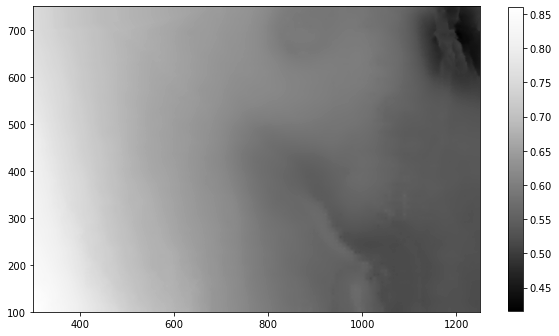

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))

im = ax.imshow(horizon, cmap='Greys_r',
               origin='lower',
               extent=[300, 1250, 100, 750],
              )
plt.colorbar(im, ax=ax, shrink=0.7)

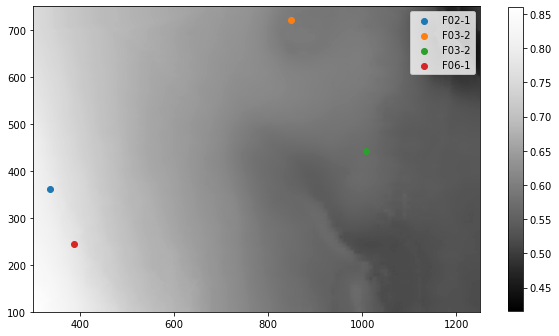

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))

im = ax.imshow(horizon, cmap='Greys_r',
               origin='lower',
               extent=[300, 1250, 100, 750],
              )
plt.colorbar(im, ax=ax, shrink=0.7)

# Add the following lines to generate labelled points onto the imshow plot.
for well in wells.values():
    ax.scatter(*reversed(well['iline_xline']), label=well['well_id'])

ax.legend()

### Multiple plots in one figure

We will often want to have more than one plot on the same figure. We can do this by changing the axis on which we plot a given thing. Here is a demonstration of plotting the horizon and a well on the same figure.

We have already seen how to handle well data, using `welly`, and its `plot` function, so let us load a well log:

In [24]:
from welly import Well
fname = spot.fetch('F02-1_logs.las')
w = Well.from_las(fname)

In [ ]:
help(w.data['GR'].plot)

<AxesSubplot:title={'center':'GR'}, xlabel='API'>

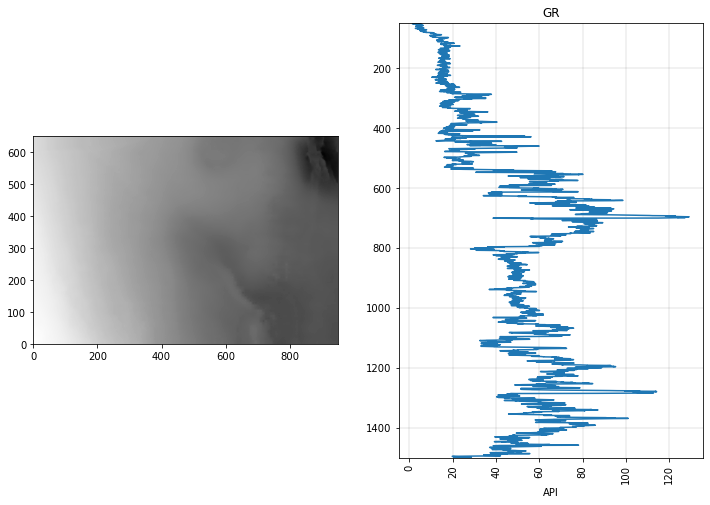

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 8))

ax = axs[0]
ax.imshow(horizon, origin='lower', cmap='Greys_r')

ax = axs[1]
w.data['GR'].plot(ax=ax)

We can get some better control over the layout by providing a dictionary named `gridspec_kw`:

Add `gridspec_kw={'width_ratios':(5,1)}` to the call to `plt.subplots` below:

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 8))

ax = axs[0]
ax.imshow(horizon, origin='lower', cmap='Greys_r')

ax = axs[1]
w.data['GR'].plot(ax=ax)

### EXERCISE

1. Extend the previous plot with the horizon and the location of the wells to also have a gamma-ray (GR) well log plotted to one side. You may need to change the `plt.subplots` call.
3. Make a plot showing the horizon on the left and a plot of the profiles along cross-line 150 and 650. Remember to account for the difference between indices of a `np.ndarray` and the survey's crossline numbers.

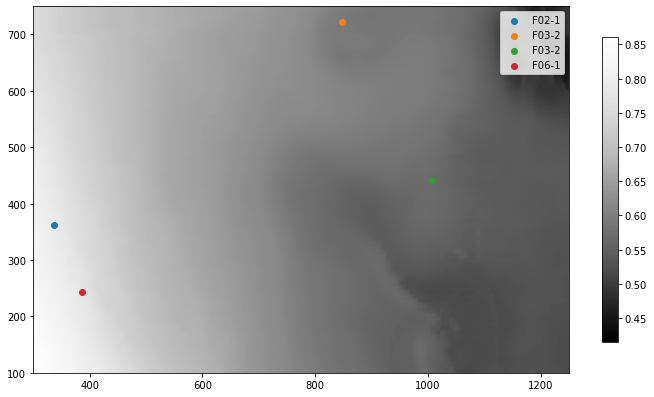

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))

im = ax.imshow(horizon, cmap='Greys_r',
               origin='lower',
               extent=[300, 1250, 100, 750],
              )
plt.colorbar(im, ax=ax, shrink=0.7)

# Add the wells.
for well in wells.values():
    ax.scatter(*reversed(well['iline_xline']), label=well['well_id'])
ax.legend()

# YOUR CODE HERE
# Add more code to have the log displayed.



Make the changes indicated in the comments below:

<AxesSubplot:title={'center':'GR'}, xlabel='API'>

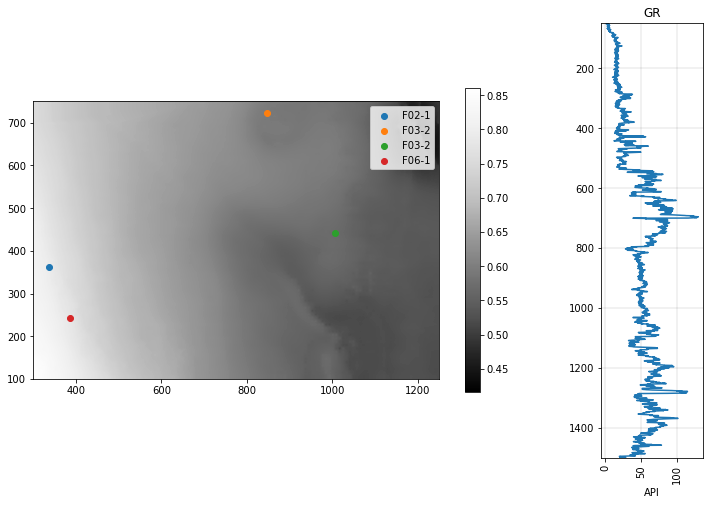

In [27]:
# Convert to having two columns and fiddle with column widths.
fig, axs = plt.subplots(ncols=2, figsize=(12, 8), gridspec_kw={'width_ratios':(5,1)})

# Change the imshow to use the first ax.
ax = axs[0]
im = ax.imshow(horizon, cmap='Greys_r',
               origin='lower',
               extent=[300, 1250, 100, 750],
              )
plt.colorbar(im, ax=ax, shrink=0.7)

for well in wells.values():
    ax.scatter(*reversed(well['iline_xline']), label=well['well_id'])
ax.legend()

# Add the plot on the second ax.
ax = axs[1]
w.data['GR'].plot(ax=ax)

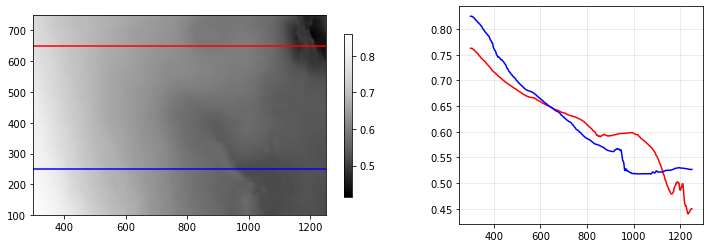

In [28]:
# Make a plot showing the horizon on the left and a plot of the profiles along cross-line 150 and 650.
fig, axs = plt.subplots(ncols=2, figsize=(12, 4), gridspec_kw={'width_ratios':(1.5,1)})

profile1 = 650
profile2 = 250

ax = axs[0]
im = ax.imshow(horizon, cmap='Greys_r', origin='lower',
                extent=[300, 1250, 100, 750],)
ax.axhline(profile1, color='red')
ax.axhline(profile2, color='blue')
plt.colorbar(im, ax=ax, shrink=0.75)

ax = axs[1]
# The -100 is needed to let us use xlines to index into the horizon.
# index 0 is xline 100, according to line 9, above.
ax.plot(np.arange(300, 1251), horizon[profile1 - 100], color='red')
ax.plot(np.arange(300, 1251), horizon[profile2 - 100], color='blue')
ax.grid('black', alpha=0.3)

## Some more plot types

Matplotlib is a vast library, so be sure to check out the gallery of examples: https://matplotlib.org/stable/gallery/index.html

If you are making statistical plots, then it may be worth looking at seaborn as well: https://seaborn.pydata.org/examples/index.html

Here are a few additional standard matplotlib plot types that may be of interest for subsurface work:

### Contour plots

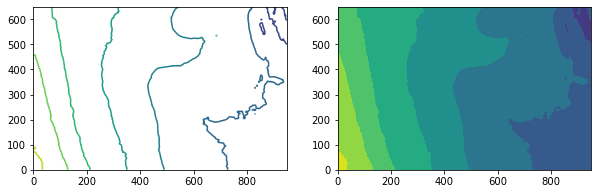

In [29]:
fig, axs = plt.subplots(ncols=2, figsize=(10,3))
axs[0].contour(horizon)
axs[1].contourf(horizon)

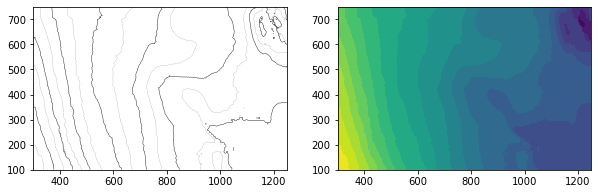

In [30]:
fig, axs = plt.subplots(ncols=2, figsize=(10,3))
axs[0].contour(horizon,
               levels=np.linspace(horizon.min(), horizon.max(), 20),
               colors='black',
               linewidths=[0.1, 0.4],
               extent=[300, 1250, 100, 750],
              )
axs[1].contourf(horizon,
                levels=np.linspace(horizon.min(), horizon.max(), 20),
                extent=[300, 1250, 100, 750],
               )

### Three-dimensional plots

While you probably have tools for this already, making a 3D plot in matplotlib is not too difficult. We first need to set up our data, accounting for the survey coordinates:

In [31]:
nrows, ncols = horizon.shape
x = np.arange(300, ncols + 300)
y = np.arange(100, nrows + 100)
x, y = np.meshgrid(x, y)

And then we can plot our surface:

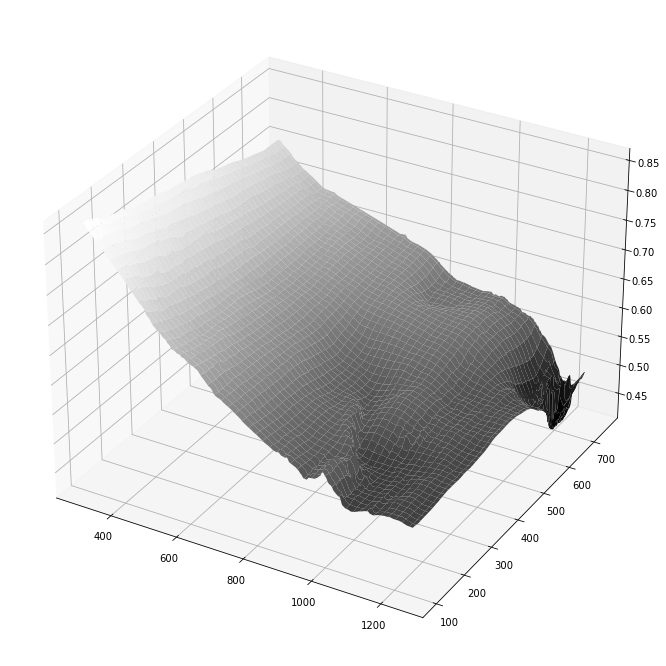

In [32]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(12,12))
surf = ax.plot_surface(x, y, horizon, cmap='Greys_r')

Doing this on the command line will give you a nice 3D plot that can be rotated and moved around, in the notebook it is just an image of a 3D plot.

If you are planning on doing a lot with 3D plots, then you may want to check out more dedicated 3D visualisation packages such as `pyvista` (https://www.pyvista.org/ and https://docs.pyvista.org/, especially https://docs.pyvista.org/getting-started/index.html), or `vispy` (https://vispy.org/gallery/scene/index.html). Other options are also available, but these likely a good place to get started.